In [148]:
import matplotlib.pyplot as plt
import numpy as np


#these system attributes are for the silver line 
nstations = 28 #number of stations
tlength = 47636.58 #meters (converted from miles)
sdensity = nstations/tlength #number of stations per meter of line 
cspeed = 14.7523 #train cruising speed in meters per second (converted from mph)
dtime = 30 #seconds
fsize = 10 #twice the number of trains operating in each direction- this I am still trying to find
 # ab density variable to be optimized- not defined because included in the function arguments 
Nhr = 8007.293153 #average number of passengers per unit time starting a trip in each station per weekday
#Nhr was calculated by averaging all the avg weekday ridership for each station for the period from 2010-2015
#in units of pax/weekday

parameterc4 = 1 #dummy value for transfer cost parameter for trip type 4, needs to be further explored

parameterc5 =  1 #dummy value for transfer cost parameter for trip type 5, needs to be further explored
N= (Nhr/18.5)*(1/3600) #metro is open for around 18.5 hours on weekdays from monday to friday
#Nhr *  1 weekdays/18.5 hours * 1 hr/3600 seconds
#N is in units of pax per second across all stations 
abdensity = 1

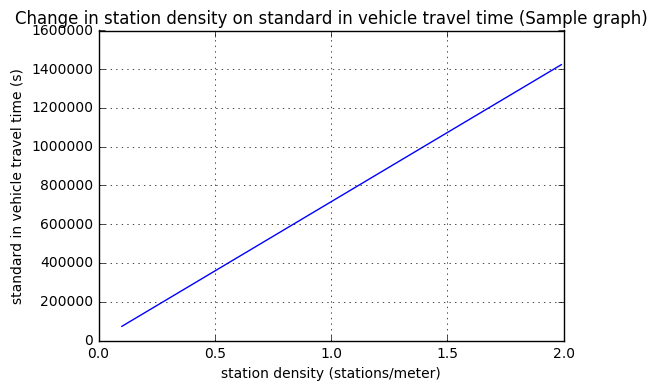

In [149]:
def standinvehicletravelTime(trackLength, stationDensity, cruisingSpeed,dwellTime):

   return ((trackLength+ (1/stationDensity))/(2*cruisingSpeed)) + (trackLength* dwellTime * (.5*stationDensity))

#in vehicle travel time for passengers while on the train for a standard stop procedure (all stop)


# Data for plotting
t = np.arange(0.1, 2.0, 0.01)
s = standinvehicletravelTime(tlength,t,cspeed,dtime)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='station density (stations/meter)', ylabel='standard in vehicle travel time (s)',
       title='Change in station density on standard in vehicle travel time (Sample graph)')
ax.grid()

fig.savefig("test.png")
plt.show()

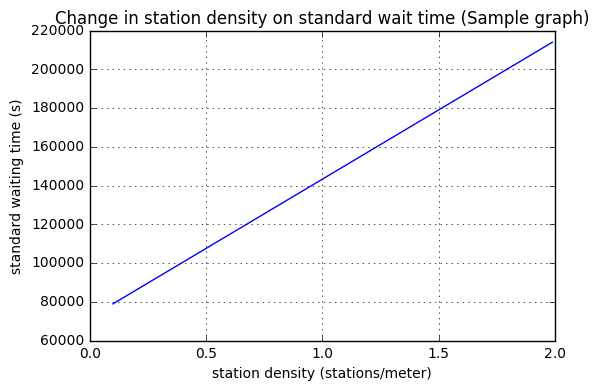

In [150]:
def standwaitingTime(trackLength, stationDensity, cruisingSpeed,dwellTime,fleetSize,abdensity):

    cycleTime= ((2*trackLength)/(cruisingSpeed)) + ((2*trackLength)*((abdensity+stationDensity)*.5)*dwellTime) # cycle time 
    
    return cycleTime/(2*fleetSize)
#waiting time for passengers on a standard stop procedure (all stop)- this is when they are not on the train 

# Data for plotting
t = np.arange(0.1, 2.0, 0.01) #plot bounds
s = standwaitingTime(tlength,t,cspeed,dtime,fsize,1) #single variable function because everything except station density is set as a constant

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)


ax.set(xlabel='station density (stations/meter)', ylabel='standard waiting time (s)',
       title='Change in station density on standard wait time (Sample graph)')
ax.grid()

fig.savefig("test.png")
plt.show()

#this code for plotting the graph was sourced from http://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html

In [151]:
#function that sets the proportion of each type of trip in the skip stop system

global p1
global p2
global p3
global p4
global p5
    
    
p1 = (abdensity**2)/(sdensity**2)
p2 = (2*(sdensity-abdensity)*abdensity)/(sdensity**2)
p3 = ((sdensity-abdensity)**2)/(2*sdensity**2)
p4 = (1/sdensity**2) * (((sdensity-abdensity)**2)/2) * (((2*tlength*abdensity)-1)/(2*tlength*abdensity))
p5 = (1/sdensity**2) * (((sdensity-abdensity)**2)/2) * (1/(2*tlength*abdensity))
    


print(p1)
#proportions of each type of trip for a skip stop operation. 
#use float to limit number of decimal places. 

2894443.5638984693


In [152]:
#function that sets the average number of stops per type of trip in the skip stop system

global p1stops
global p2stops
global p3stops
global p4stops
global p5stops
    
p1stops  = (tlength*(sdensity+abdensity))/(2*(2-(tlength*abdensity)**-1)) 
p2stops = ((sdensity+ abdensity)*tlength)/4
p3stops = (tlength)* ((sdensity+abdensity)/4)
p4stops = ((tlength)**2 * abdensity * (sdensity+abdensity))/(2*((2*tlength*abdensity) -1))
p5stops = (sdensity + 5*abdensity)/(4*abdensity)
    

cycletime = ((2*tlength)/(cspeed)) + ((2*tlength)*((sdensity+abdensity)/2)*(dtime))



#average number of stops for each type of trip for a skip stop operation. 
#The output values are just sample values, they do not represent actual quantities. 

In [153]:
    global w1time
    global w2time
    global w3time
    global w4time
    global w5time
    
    w1time= cycletime/(2*fsize)
    w2time= 2*w1time
    w3time= 2*w1time
    w4time= 4*w1time
    w5time= 4*w1time
    
 
    
    #waiting time for each type of trip; the waiting times after the first one are defined in terms of w1time. 
    #these are for skip stop procedures, where there are multiple types of trips (A and B trains)



#The output values are just sample values, they do not represent actual quantities. 

In [154]:
totalWaitingCost = N*p1*w1time + N*p2*w2time+N*p3*w3time+N*p4*w4time+N*p5*w5time
#VSE has been excluded 
totalTransferCost = N*(p4*parameterc4 + p5*parameterc5)

singleP1 = (((tlength+(1/sdensity))/(2*cspeed))+ (dtime*p1stops))
singleP2= (((tlength+(1/sdensity))/(2*cspeed))+ (dtime*p2stops))
singleP3 = (((tlength+(1/sdensity))/(2*cspeed))+ (dtime*p3stops))
singleP4= (((tlength+(1/sdensity)+(.5*abdensity))/(2*cspeed))+ (dtime*p4stops))
singleP5 = (((2/(3*abdensity))/cspeed)+ (dtime*p2stops))

singlePassengerTravelTime = singleP1+singleP2+singleP3+singleP4+singleP5

totalTravelTime = N*(((p1*singleP1)+(p2*singleP2)+(p3*singleP3)+(p4*singleP4)+(p5*singleP5)))

#putting the number of passengers outside of the summation to simplify code 

#VSV has been excluded

In [155]:
def skipStoppingCost(abstationden):
    global abdensity = abstationden
    
    station1= totalTravelTime
    
    return station1
    
    #the second addend in this equation I am unsure about because the paper doesn't clearly specify what exactly it is. 
    


    


    

SyntaxError: invalid syntax (<ipython-input-155-63cd91c378fa>, line 2)

In [ ]:
print(abdensity)
skipStoppingCost(.1)
print(abdensity)
#plt.plot([1,2,3,4,5])
#plt.ylabel('Skip Stopping Cost- Modified Continuous Approximation Model')
#plt.show()

0.0005877835898378935
0.12022962692192192


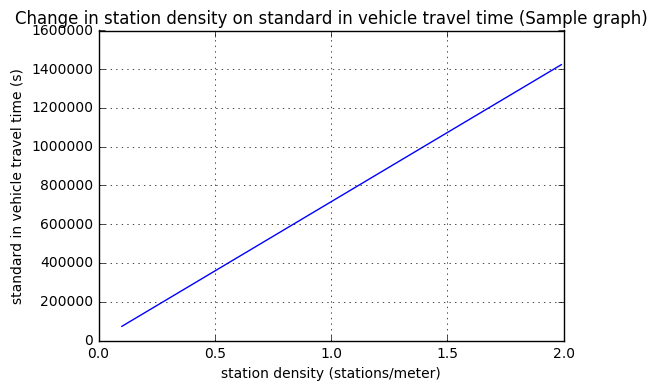

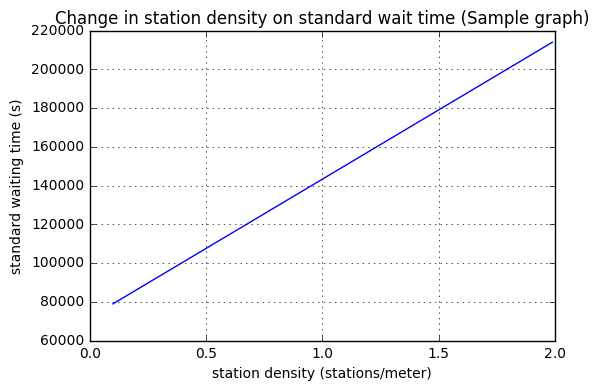

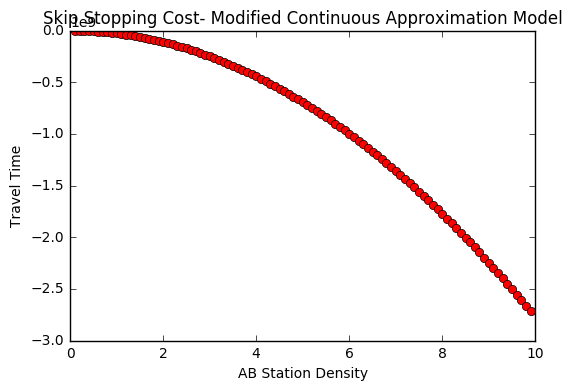

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 10 01:15:58 2017

@author: anoopscoop
"""

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#these system attributes are for the silver line 
outputlist= list()

nstations = 28 #number of stations
tlength = 47636.58 #meters (converted from miles)
sdensity = nstations/tlength #number of stations per meter of line 
print(sdensity)
cspeed = 14.7523 #train cruising speed in meters per second (converted from mph)
dtime = 30 #seconds
fsize = 10#twice the number of trains operating in each direction- this I am still trying to find
 # ab density variable to be optimized- not defined because included in the function arguments 
Nhr = 8007.293153 #average number of passengers per unit time starting a trip in each station per weekday
#Nhr was calculated by averaging all the avg weekday ridership for each station for the period from 2010-2015
#in units of pax/weekday

parameterc4 = 1 #dummy value for transfer cost parameter for trip type 4, needs to be further explored

parameterc5 =  1 #dummy value for transfer cost parameter for trip type 5, needs to be further explored
N= (Nhr/18.5)*(1/3600) #metro is open for around 18.5 hours on weekdays from monday to friday
#Nhr *  1 weekdays/18.5 hours * 1 hr/3600 seconds
#N is in units of pax per second across all stations 
print(N)
abdensity=0.1


def standinvehicletravelTime(trackLength, stationDensity, cruisingSpeed,dwellTime):

   return ((trackLength+ (1/stationDensity))/(2*cruisingSpeed)) + (trackLength* dwellTime * (.5*stationDensity))

#in vehicle travel time for passengers while on the train for a standard stop procedure (all stop)


# Data for plotting
t = np.arange(0.1, 2.0, 0.01)
s = standinvehicletravelTime(tlength,t,cspeed,dtime)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='station density (stations/meter)', ylabel='standard in vehicle travel time (s)',
       title='Change in station density on standard in vehicle travel time (Sample graph)')
ax.grid()

fig.savefig("test.png")
plt.show()


def standwaitingTime(trackLength, stationDensity, cruisingSpeed,dwellTime,fleetSize,abdensity):

    cycleTime= ((2*trackLength)/(cruisingSpeed)) + ((2*trackLength)*((abdensity+stationDensity)*.5)*dwellTime) # cycle time 
    
    return cycleTime/(2*fleetSize)
#waiting time for passengers on a standard stop procedure (all stop)- this is when they are not on the train 

# Data for plotting
t = np.arange(0.1, 2.0, 0.01) #plot bounds
s = standwaitingTime(tlength,t,cspeed,dtime,fsize,1) #single variable function because everything except station density is set as a constant

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)


ax.set(xlabel='station density (stations/meter)', ylabel='standard waiting time (s)',
       title='Change in station density on standard wait time (Sample graph)')
ax.grid()

fig.savefig("test.png")
plt.show()

#this code for plotting the graph was sourced from http://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html



   
#use float to limit number of decimal places. 

#function that sets the average number of stops per type of trip in the skip stop system

   


#The output values are just sample values, they do not represent actual quantities. 



   



#putting the number of passengers outside of the summation to simplify code 

#VSV has been excluded



def skipStoppingCost(abstationden):
    
    #proportions of each type of trip for a skip stop operation. 
   
    
    
    #average number of stops for each type of trip for a skip stop operation. 

    global abdensity
    global outputlist
    
    
    for i in range(len(abstationden)):
        
        abdensity = abstationden[i]

        p1 = (abdensity**2)/(sdensity**2)
        p2 = (2*(sdensity-abdensity)*abdensity)/(sdensity**2)
        p3 = ((sdensity-abdensity)**2)/(2*sdensity**2)
        p4 = (1/sdensity**2) * (((sdensity-abdensity)**2)/2) * (((2*tlength*abdensity)-1)/(2*tlength*abdensity))
        p5 = (1/sdensity**2) * (((sdensity-abdensity)**2)/2) * (1/(2*tlength*abdensity))
        
           
        p1stops  = (tlength*(sdensity+abdensity))/(2*(2-(tlength*abdensity)**-1)) 
        p2stops = ((sdensity+ abdensity)*tlength)/4
        p3stops = (tlength)* ((sdensity+abdensity)/4)
        p4stops = ((tlength)**2 * abdensity * (sdensity+abdensity))/(2*((2*tlength*abdensity) -1))
        p5stops = (sdensity + 5*abdensity)/(4*abdensity)
        
        cycletime = ((2*tlength)/(cspeed)) + ((2*tlength)*((sdensity+abdensity)/2)*(dtime))
        #print(cycletime)
        #The "single" variables are the travel times for a single passenger for a given trip type
        singleP1 = (((tlength+(1/sdensity))/(2*cspeed))+ (dtime*p1stops))
        singleP2= (((tlength+(1/sdensity))/(2*cspeed))+ (dtime*p2stops))
        singleP3 = (((tlength+(1/sdensity))/(2*cspeed))+ (dtime*p3stops))
        singleP4= (((tlength+(1/sdensity)+(.5*abdensity))/(2*cspeed))+ (dtime*p4stops))
        singleP5 = (((2/(3*abdensity))/cspeed)+ (dtime*p5stops))
        
        w1time= cycletime/(2*fsize)
        w2time= 2*w1time
        w3time= 2*w1time
        w4time= 4*w1time
        w5time= 4*w1time
             
        #waiting time for each type of trip; the waiting times after the first one are defined in terms of w1time. 
        #these are for skip stop procedures, where there are multiple types of trips (A and B trains)
        
        #The output values are just sample values, they do not represent actual quantities. 
        
        
        totalWaitingCost = N*p1*w1time + N*p2*w2time+N*p3*w3time+N*p4*w4time+N*p5*w5time
        
        #VSE has been excluded 
        totalTransferCost = N*(p4*parameterc4 + p5*parameterc5) 
        #The parameterc4 and parameterc5 are both dummy variables because the exact value is not yet known.
        totalTravelCost = N*(((p1*singleP1)+(p2*singleP2)+(p3*singleP3)+(p4*singleP4)+(p5*singleP5)))
        
        totalSkippingCost = totalTravelCost + totalWaitingCost + totalTransferCost
        
        
        outputlist.append(totalSkippingCost)
    
    
       
    return outputlist
    

    #the second addend in this equation I am unsure about because the paper doesn't clearly specify what exactly it is. 
    

    
#print(abdensity)
#print(abdensity)
absvals = np.arange(0.1, 10.0, 0.1)
#print(len(absvals))
#print(len(skipStoppingCost(absvals)))

#https://matplotlib.org/gallery/pyplots/pyplot_formatstr.html#sphx-glr-gallery-pyplots-pyplot-formatstr-py
plt.plot(absvals,skipStoppingCost(absvals), 'ro')
plt.title('Skip Stopping Cost- Modified Continuous Approximation Model')
plt.ylabel('Travel Time')
plt.xlabel('AB Station Density')
plt.show()
    
